In [ ]:

import kagglehub
dgomonov_new_york_city_airbnb_open_data_path = kagglehub.dataset_download('dgomonov/new-york-city-airbnb-open-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


***Load Important Libraries And CSV File As Well***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


***First We Are Trying To Find Data Information And Missing Value***

In [ ]:
print("DataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review     

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


**Stastics Summary For Each and Every portion**

In [ ]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.

***Find Unique Value In categorical Column***

In [ ]:
print("Unique neighbourhood groups:", df['neighbourhood_group'].unique())
print("Unique room types:", df['room_type'].unique())


Unique neighbourhood groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique room types: ['Private room' 'Entire home/apt' 'Shared room']


***Drop Last_Review Column***

***Plot Price Distribution In Hist Plot***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


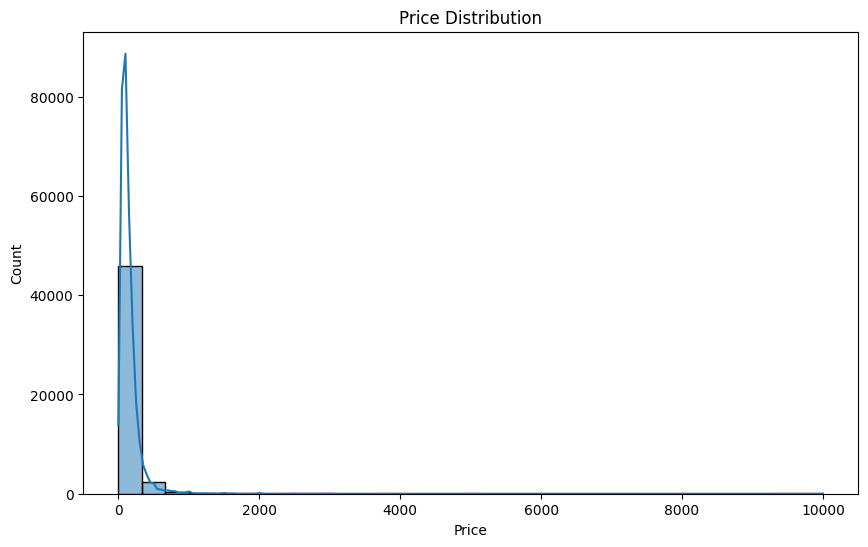

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

***Box Plot Price Distribution for Finding Outlier Point***

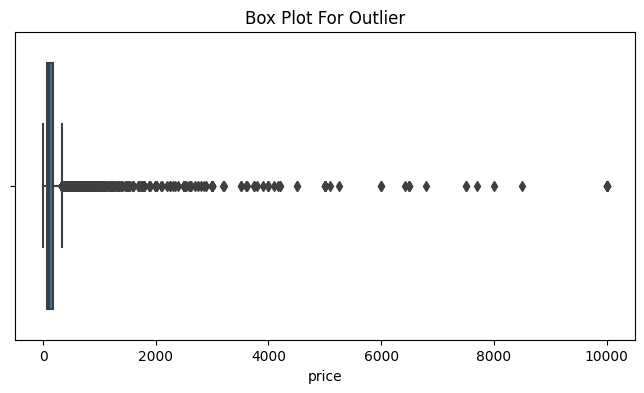

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Box Plot For Outlier')
plt.show()

***Count Plot***

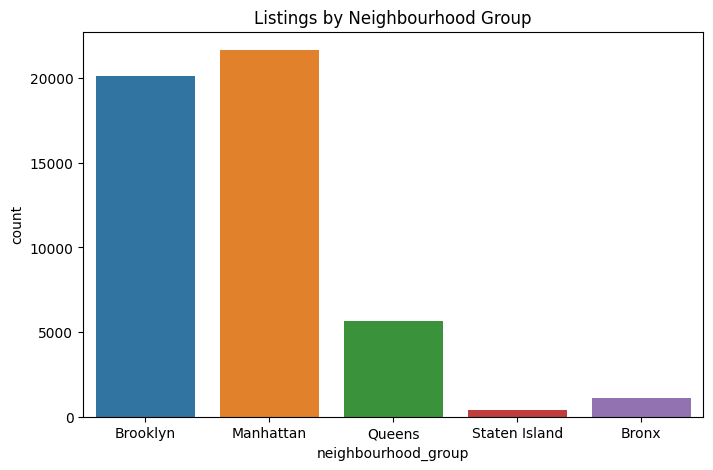

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Listings by Neighbourhood Group')
plt.show()

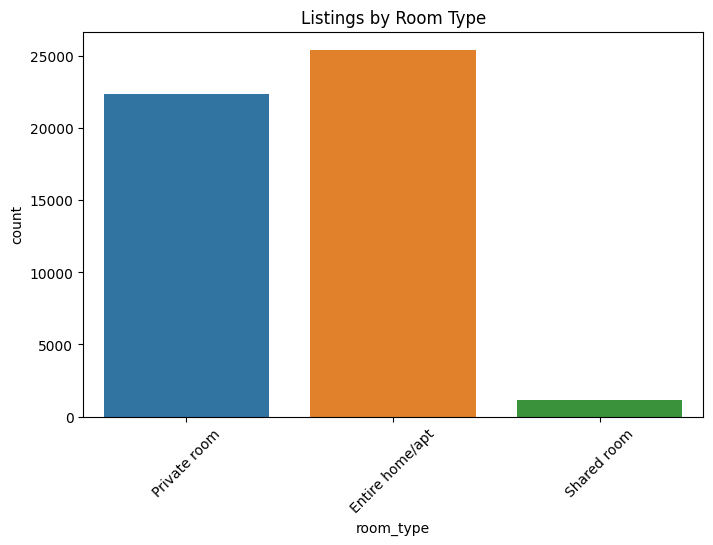

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type')
plt.title('Listings by Room Type')
plt.xticks(rotation=45)
plt.show()

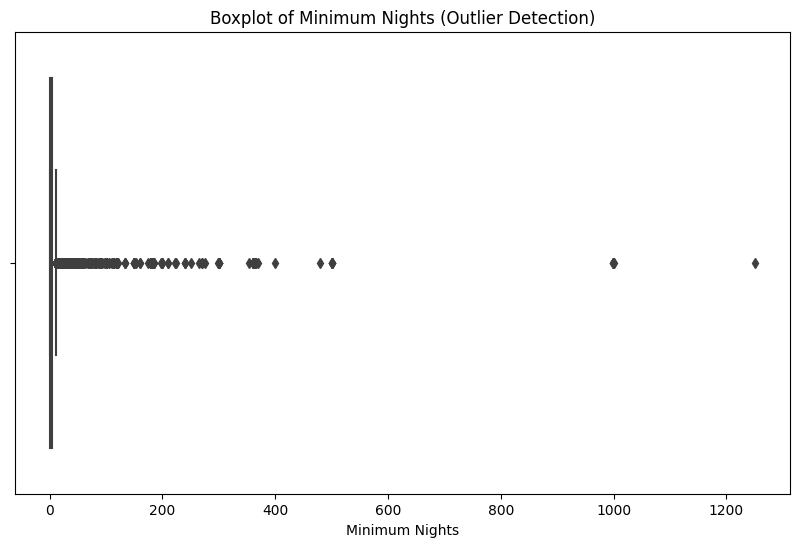

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights (Outlier Detection)')
plt.xlabel('Minimum Nights')
plt.show()


***Scatter Plot***

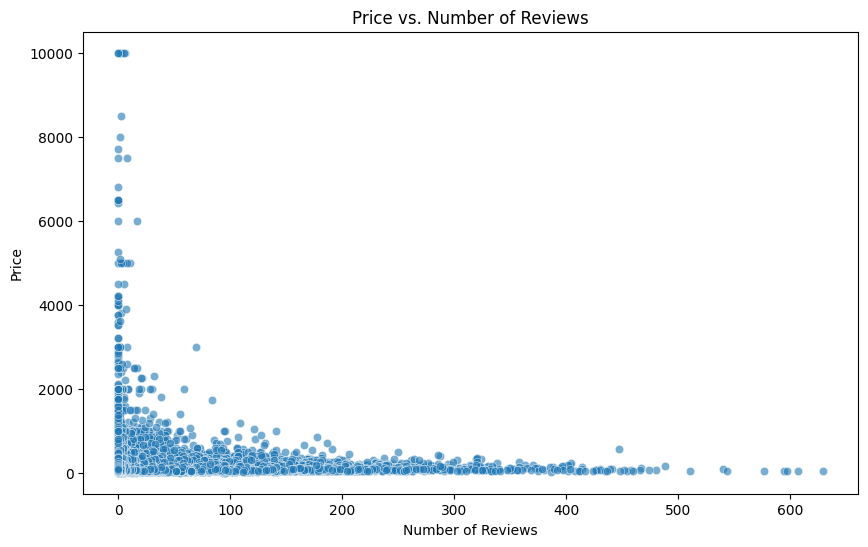

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


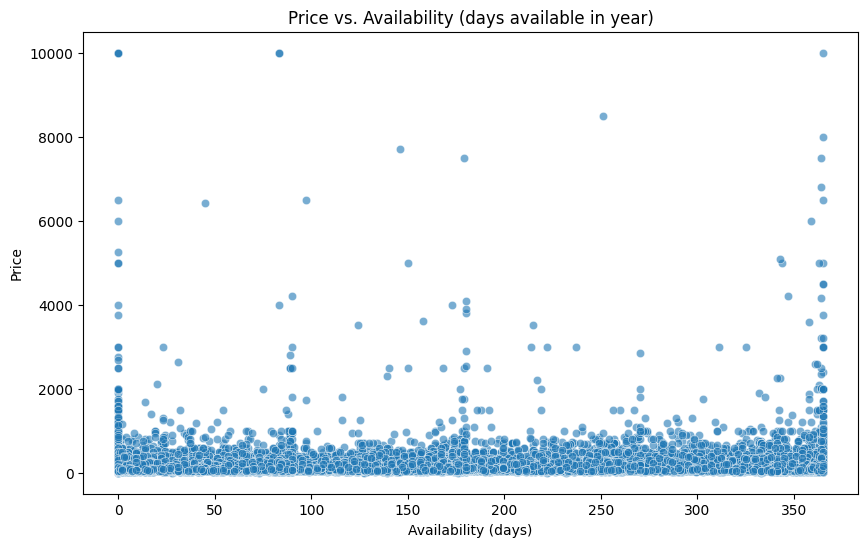

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6)
plt.title('Price vs. Availability (days available in year)')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()

***IQR Based Otlier Detection***

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Price outlier thresholds -> Lower: {lower_bound}, Upper: {upper_bound}")
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of price outliers: {outliers.shape[0]}")

Price outlier thresholds -> Lower: -90.0, Upper: 334.0
Number of price outliers: 2972


****Problem Statement -2: Cetral Tendency And Visulization****

***Visualization of Heat Map***

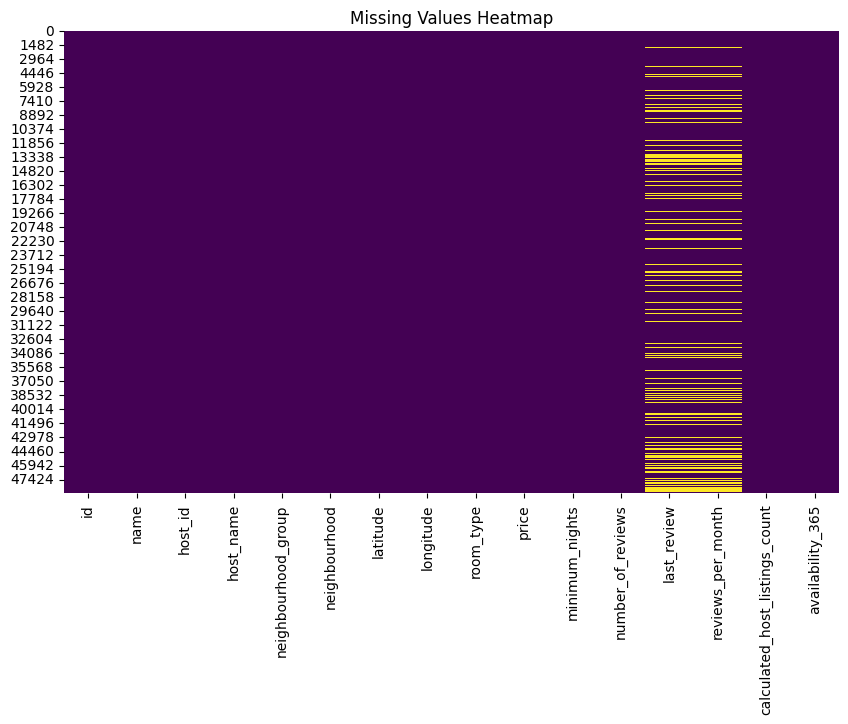

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(10, 6))

# Heatmap for missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:

numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']


df_clean = df[numerical_cols].copy()

# Drop rows with NaN
df_clean = df_clean.dropna()


df_clean = df_clean[df_clean['price'] < 1000]
df_clean = df_clean[df_clean['minimum_nights'] < 365]


central_tendency = {
    'Mean': df_clean.mean(),
    'Median': df_clean.median(),
    'Mode': df_clean.mode().iloc[0]
}


ct_df = pd.DataFrame(central_tendency)
print(ct_df)

                         Mean  Median    Mode
price              135.187374  100.00  150.00
minimum_nights       5.559304    2.00    2.00
number_of_reviews   29.360891    9.00    1.00
reviews_per_month    1.375992    0.72    0.02
availability_365   114.444755   55.00    0.00


***Visualize Central Tendency***

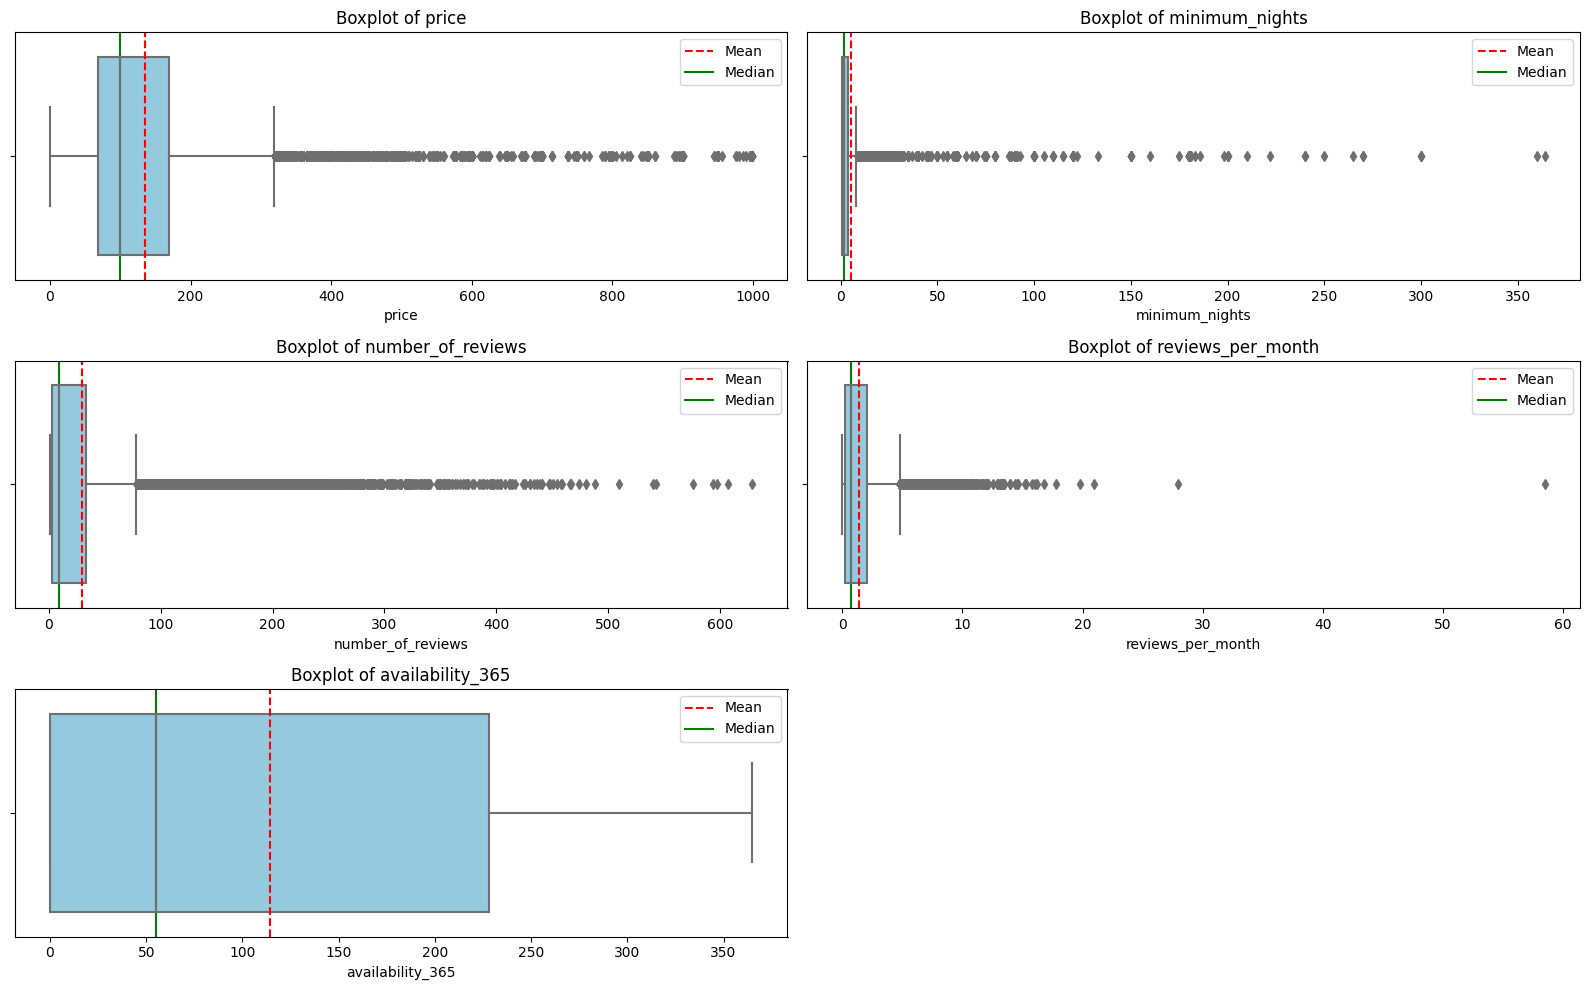

In [ ]:
# Set up the plotting grid
plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df_clean[column], color='skyblue')
    plt.axvline(df_clean[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_clean[column].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Boxplot of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


***Visualiza CLT with Histogram***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

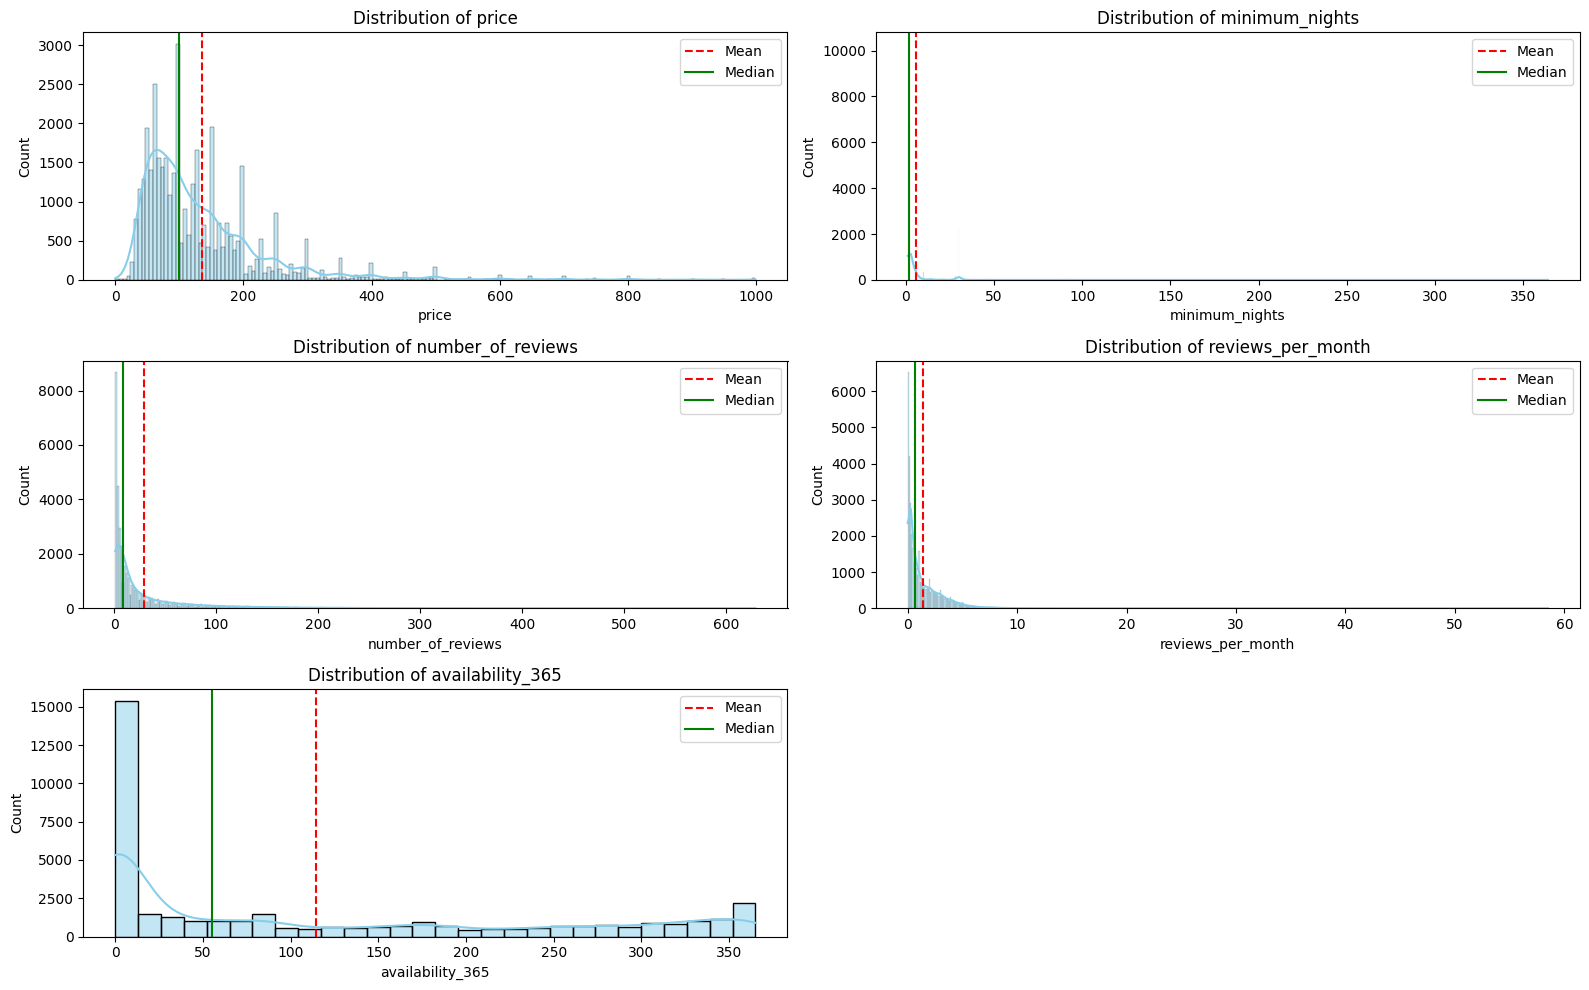

In [ ]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_clean[column], kde=True, color='skyblue')
    plt.axvline(df_clean[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_clean[column].median(), color='green', linestyle='-', label='Median')
    plt.title(f'Distribution of {column}')
    plt.legend()

plt.tight_layout()
plt.show()


***Create The Box Plot For Visualize The price With Room Type For Oulier Detection***

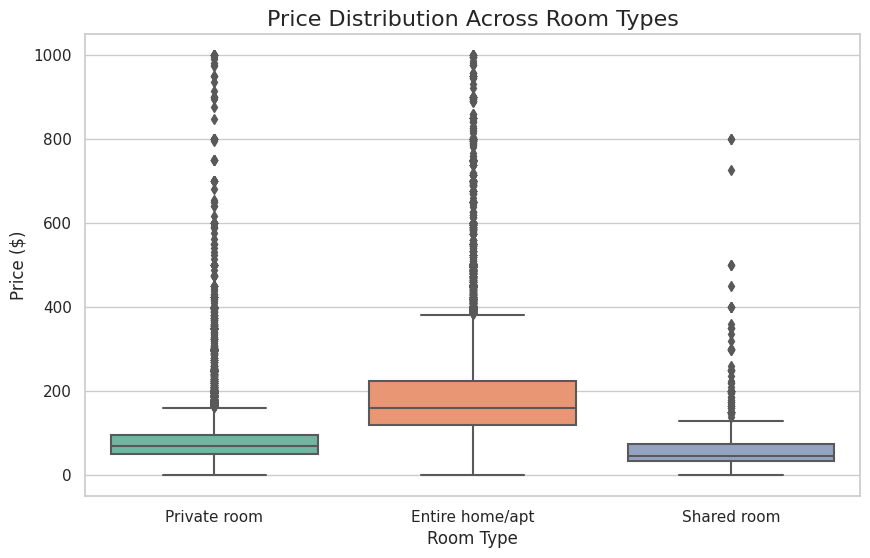

In [ ]:

df = df[df['price'] < 1000]
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='Set2')

# Add title and labels
plt.title('Price Distribution Across Room Types', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)


plt.show()

***Median Price With Group By***

In [ ]:
# Median price per room type with Group By
median_prices = df.groupby('room_type')['price'].median()
print("Median Prices by Room Type:")
print(median_prices)


Median Prices by Room Type:
room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64


***Problem -3 Sampling and CLT***

In [ ]:

population = df['calculated_host_listings_count'].dropna()

print(f"Population Size: {len(population)}")

Population Size: 48597


***Plot Histogram***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


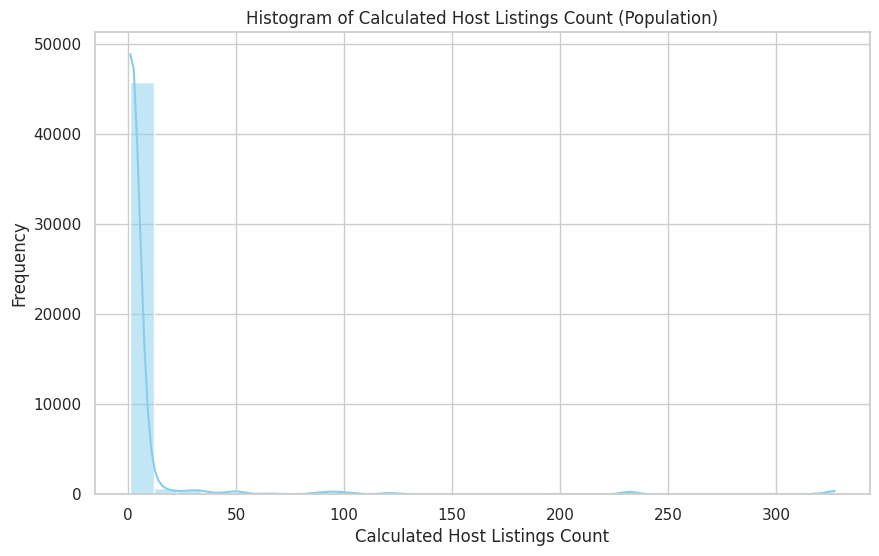

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Calculated Host Listings Count (Population)")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Calculate population mean
population_mean = population.mean()
print(f"Population Mean: {population_mean:.2f}")


Population Mean: 7.17


In [ ]:
population = df['calculated_host_listings_count'].dropna()

sample_size = 50
num_samples = 1000
sample_means = []


for _ in range(num_samples):
    sample = population.sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Convert to Series for analysis if needed
sample_means_series = pd.Series(sample_means)

# Display the first few sample means
print(sample_means_series.head())

0    3.42
1    4.88
2    4.22
3    3.42
4    2.44
dtype: float64


***SAMPLING DISTRIBUTION***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


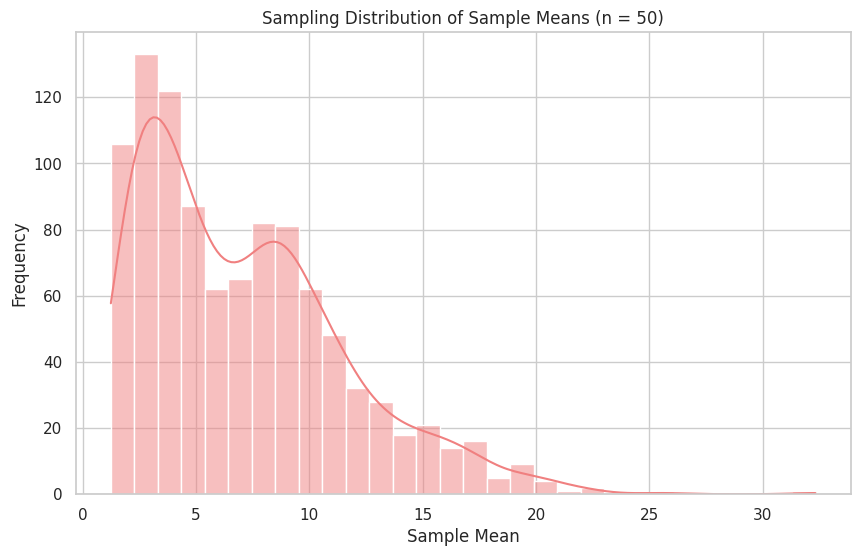

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='lightcoral')
plt.title("Sampling Distribution of Sample Means (n = 50)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


In [ ]:

population_mean = population.mean()

# Calculate mean of the 1000 sample means
sampling_distribution_mean = np.mean(sample_means)

# Display both
print(f"Population Mean: {population_mean:.4f}")
print(f"Mean of 1000 Sample Means: {sampling_distribution_mean:.4f}")


Population Mean: 7.1680
Mean of 1000 Sample Means: 7.1059


***Problem StateMent 4- Hypothesis Testing***

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter data for the two boroughs
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']

brooklyn_prices = brooklyn_prices[brooklyn_prices < 1000]
manhattan_prices = manhattan_prices[manhattan_prices < 1000]


t_stat, p_value = ttest_ind(brooklyn_prices, manhattan_prices, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in average prices.")
else:
    print("Fail to reject the null hypothesis - No significant difference in average prices.")



T-statistic: -54.9577
P-value: 0.0000
Reject the null hypothesis - There is a significant difference in average prices.


In [ ]:
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']


manhattan_prices = manhattan_prices[manhattan_prices < 1000]
brooklyn_prices = brooklyn_prices[brooklyn_prices < 1000]


price_df = pd.DataFrame({
    'Manhattan_Price': manhattan_prices.reset_index(drop=True),
    'Brooklyn_Price': brooklyn_prices.reset_index(drop=True)
})

print(price_df.head())

   Manhattan_Price  Brooklyn_Price
0              225           149.0
1              150            89.0
2               80            60.0
3              200            89.0
4               79           140.0


***Problem-5 Advance Pandas Operation***

In [ ]:
import pandas as pd


filtered_listings = df[
    (df['neighbourhood_group'] == 'Bronx') &
    (df['price'] < 100) &
    (df['number_of_reviews'] > 10)
]

print(filtered_listings)


             id                                               name    host_id  \
171       44096                                   Room with a View     190409   
207       54626                     Cozy bedroom by Yankee Stadium     190409   
433      149777  Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...     716306   
484      169306                                 Affordable & Cozy      806214   
557      206071         Yankee Stadium Oasis 2 stops to Manhattan!      12221   
...         ...                                                ...        ...   
42958  33363084  E community that is commercially (Website hidd...  242175033   
43839  33907325  TW #5 Private Rm - 1st Fl. Queen Bed 1 to 2 Gu...  211136294   
44762  34392044           Lovely and affordable place in the Bronx  178924110   
44873  34444744          Large Private room queen bed near kitchen  147762665   
45260  34643695  1B. Studio & Stay 30 minutes to Midtown Manhattan   37678939   

                     host_n

In [ ]:
import pandas as pd


grouped = df.groupby(['neighbourhood_group', 'room_type']).agg({
    'price': ['mean', 'min', 'max'],
    'number_of_reviews': 'mean',
    'id': 'count'
})


#Rename Column
grouped.columns = ['avg_price', 'min_price', 'max_price', 'avg_reviews', 'total_listings']
print(grouped)


                                      avg_price  min_price  max_price  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt  125.198413         28        670   
                    Private room      63.050691          0        680   
                    Shared room       59.800000         20        800   
Brooklyn            Entire home/apt  167.628746          0        999   
                    Private room      72.566400          0        974   
                    Shared room       50.527845          0        725   
Manhattan           Entire home/apt  222.463891          0        999   
                    Private room     108.998240         10        999   
                    Shared room       87.075157         10        800   
Queens              Entire home/apt  141.172414         10        900   
                    Private room      68.244214         10        900   
                    Shared room       49.312821    

***Vectorize operation***

In [ ]:
import pandas as pd
import numpy as np


conditions = [
    (df['availability_365'] == 0),
    (df['availability_365'] > 0) & (df['availability_365'] <= 180),
    (df['availability_365'] > 180)
]

choices = ['low', 'medium', 'high']

df['availability_category'] = np.select(conditions, choices, default='unknown')

print(df[['availability_365', 'availability_category']])


       availability_365 availability_category
0                   365                  high
1                   355                  high
2                   365                  high
3                   194                  high
4                     0                   low
...                 ...                   ...
48890                 9                medium
48891                36                medium
48892                27                medium
48893                 2                medium
48894                23                medium

[48597 rows x 2 columns]


***Eval Function High Performance Calculation***

In [ ]:
# Calculate review_score with eval for performance
df.eval('review_score = reviews_per_month * number_of_reviews / (minimum_nights + 1)', inplace=True)

# Show results
print(df[['reviews_per_month', 'number_of_reviews', 'minimum_nights', 'review_score']])


       reviews_per_month  number_of_reviews  minimum_nights  review_score
0                   0.21                  9               1      0.945000
1                   0.38                 45               1      8.550000
2                    NaN                  0               3           NaN
3                   4.64                270               1    626.400000
4                   0.10                  9              10      0.081818
...                  ...                ...             ...           ...
48890                NaN                  0               2           NaN
48891                NaN                  0               4           NaN
48892                NaN                  0              10           NaN
48893                NaN                  0               1           NaN
48894                NaN                  0               7           NaN

[48597 rows x 4 columns]


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
